## **Heat Equation Solver**

The following is an attempt at a flexible solver for the heat equation in 1 and 2 dimensions. The solver takes a custom built initial condition in the form of a csv file in order to streamline the visualization of comlex ICs. Then it allows for boundary conditions to be individually set as functions. It gives a recommendation as to which solver is optimal, but allows the user to choose for themself.


**Any boxes requiring user input will be preceed by an &**

*Notation: for the purposes of this program, i with be used to index x-values, j will be used to index y-values, and n will be used to index t-values.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Build an initial condition**

The code bellow accepts csv files valued in [0,1] as maps which lead to an initial condition. The filepaths to two basic ICs are linked below as examples.

In [ ]:
directory = 'PATH TO DIRECTORY'

# Upload a .csv as an initial condition
custom_IC = directory + None

# Or choose from these premade ones
Rod_test = directory + '1D_Test.csv' # l = 100, boundaries at 1
Plate_test = directory + '2D_Test.csv' # 100 x 100, boundaries at 1

& Make selection:

In [ ]:
filepath = Plate_test

In [ ]:
# The code here automatically initializes an np array using the IC
initial_condition = np.genfromtxt(filepath, delimiter = ',')

dimension = np.size(np.shape(initial_condition))
print(f'Initial condition loaded in {dimension} dimensions')

Initial condition loaded in 2 dimensions


**Set Parameters**

&

In [203]:
# Input your heat-diffusion constant
a = 0.01

**Describe a boundary condition**

& Input the functions which govern either end of the equation. Then, in the first line, specify whether each is explict ('d') or a derrivitive ('n') boundary.

In [205]:
boundaries = ('d','d','d','d') # Left, right, top, bottom

def left(t,y=None):
  return np.cos(t)
def right(t,y=None):
  return np.cos(t)

# Only used for 2D problems
def top(t,x=None):
  return np.cos(t)
def bottom(t,x=None):
  return np.cos(t)



**Set resolution**

& Input parameters in this function to set the resolution and scale of the system. WOLOG time will begin at t=0, and the origin (0,0) will be the bottom left corner of the matrix.

In [206]:
length = 1 # Maximum x-value
height = 1 # Maximum y_value
goal_time = 1 # Final time
maximum_time_step = 0.005 # Desired final timestep

In [207]:
# What follows calculates certain parameters from what is input above for use
# in later calculations.
t_lim = [0, goal_time]

# Setup x-coords
x_lim = [0, length]
Nx = np.shape(initial_condition)[0]
dx = length / Nx
x_span = np.linspace(x_lim[0], x_lim[1], Nx) # x-reference vector

# Setup y-coords
if dimension == 2:
  y_lim = [0, height]
  Ny = np.shape(initial_condition)[1]
  dy = height / Ny
  y_span = np.linspace(y_lim[0], y_lim[1], Ny)

**Check for acceptable methods methods**

In [208]:
# Find the maximum time-step allowed by stability
def stabilityFD1D(dx, a):
  dtMax = (dx**2) / a
  return dtMax
def stabilityFD2D(dx, dy, a):
  dtMax = (dx**2 * dy**2) / (2 * a * (dx**2 + dy**2))
  return dtMax
def stabilityFEM1D(dx, a):
  dtMax = (dx**2) / (2*a)
  return dtMax
def stabilityFEM2D(dx, dy, a):
  dtMax = (dx**2 * dy**2) / (4 * a * (dx**2 + dy**2))
  return dtMax

# Find the actual maximum timestep based on desired resolution
def timeStepper(methodFunc, maximum_time_step):
  if dimension == 1:
    stabt = methodFunc(dx, a)
  elif dimension == 2:
    stabt = methodFunc(dx, dy, a)
  dt = np.min([stabt, maximum_time_step])
  return dt

# Now, given a timestep, the following all estimate computational complexity
def complexityFD1D(dx,dt,x_lim,t_lim):
  grid_size = (x_lim[1] - x_lim[0])/dx * (t_lim[1] - t_lim[0])/dt
  complexity = 12 * grid_size # 12  is the number of operations per grid point
  return complexity
def complexityFD2D(dx,dy,dt,x_lim,y_lim,t_lim):
  mesh_size = (x_lim[1] - x_lim[0])/dx * (t_lim[1] - t_lim[0])/dt
  complexity = 21 * mesh_size # 21 is the number of operations per grid point
  return complexity
def complexityFEM1D(dx,dt,x_lim,t_lim):
  grid_size = (x_lim[1] - x_lim[0])/dx * (t_lim[1] - t_lim[0])/dt
  complexity = 20*grid_size # This is an estimate
  return complexity
def complexityFEM2D(dx,dy,dt,x_lim,y_lim,t_lim):
  mesh_size = (x_lim[1] - x_lim[0])/dx * (t_lim[1] - t_lim[0])/dt
  complexity = 40*mesh_size # This is an estimate
  return complexity

# Recommend the least computationally complex method
def recommendMethods():
  if dimension == 1:
    dtFD = timeStepper(stabilityFD1D, maximum_time_step)
    dtFEM = timeStepper(stabilityFEM1D, maximum_time_step)
    cFD = complexityFD1D(dx,dtFD,x_lim,t_lim)
    cFEM = complexityFEM1D(dx,dtFEM,x_lim,t_lim)
  elif dimension == 2:
    dtFD = timeStepper(stabilityFD2D, maximum_time_step)
    dtFEM = timeStepper(stabilityFEM2D, maximum_time_step)
    cFD = complexityFD2D(dx,dy,dtFD,x_lim,y_lim,t_lim)
    cFEM = complexityFEM2D(dx,dy,dtFEM,x_lim,y_lim,t_lim)

  if cFD > cFEM:
    recommendation = 'Finite Element Method'
    timestep = dtFEM
  else:
    recommendation = 'Finite Difference Method'
    timestep = dtFD
  return recommendation, timestep

recommendation, timestep = recommendMethods()
print(f'Least comuptationally intense method is predicted to be {recommendation} with dt={timestep}')

Least comuptationally intense method is predicted to be Finite Difference Method with dt=0.0024999999999999996


**Select a method**

This code requests the user to input which method to use.

In [209]:
method = None

finiteDifferenceList = ['finitedifference','fdm', 'fd','finitedifferencemethod', 'finite-difference']
finiteElementList = ['finiteelement', 'fem', 'fe', 'finiteelementmethod', 'finite-element']

def selector():
  method_select = input('Please input method...')

  if method_select.lower().strip() in finiteDifferenceList:
    method ='fd'
    print(f'Initializing Finite Difference Method with in {dimension} dimensions.')

  if method_select.lower().strip() in finiteElementList:
    method ='fem'
    raise ValueError('FEM not yet implemented. Please select another method.')
    #print(f'Initializing Finite Difference Method with in {dimension} dimensions.')

  if method_select.lower().strip() == 'help':
    print('Please input a method. Your options are: Finite Difference Method')

  return method

method = selector()

Please input method...fd
Initializing Finite Difference Method with in 2 dimensions.


**Build Tensor**

Based on the selections made above, this cell will build a tensor which will hold the data generated and maintain the desired resolution.

In [220]:
# MANUAL TIMESTEP OVERIDE (use this only if you are certain about your timestep,
# or are trying to create instability)

timestep = 0.1

In [221]:
def bsetter(func, u_boundary, times, space=np.array([0])):
    if dimension == 1:
        g = times[1] - times[0]  # Time step
        boundary = np.zeros(len(times))  # Initialize boundary array
        boundary[0] = u_boundary[0]  # Set initial boundary condition

        for i, t in enumerate(times[:-1]):  # Loop over time steps
            boundary[i + 1] = boundary[i] + func(t) * g

    elif dimension == 2:
        h = space[1] - space[0]  # Space step
        g = times[1] - times[0]  # Time step
        boundary = np.zeros((len(space), len(times)))  # Initialize boundary array
        boundary[0, 0] = u_boundary[0, 0]  # Set initial boundary condition

        for i, t in enumerate(times[:-1]):  # Loop over time steps
            for j, q in enumerate(space[:-1]):  # Loop over spatial steps
                boundary[j + 1, i + 1] = boundary[j, i] + func(t, q) * g * h

    return boundary

In [222]:
# Based on method selected and input parameters, select the optimal t-step
dt = timestep
# Now knowing all parameters, we will now intialize a tensor to hold all our values.
Nt = int((t_lim[1] - t_lim[0]) / dt) + 1
t_span = np.linspace(t_lim[0], t_lim[1], Nt) # x-reference vector

if dimension == 1:
  u = np.zeros([Nx, Nt]) # Initialize tensor
  u[:,0] = initial_condition # Fill initial condition

  # Fill in boundaries
  if boundaries[0] == 'd':
    u[0,:] = left(t_span)
  elif boundaries[0] == 'n':
    u[0,:] = bsetter(left, u[0,:], t_span)

  if boundaries[1] == 'd':
    u[-1,:] = right(t_span)
  elif boundaries[1] == 'n':
    u[-1,:] = bsetter(right, u[-1,:], t_span)

elif dimension ==2:
  u = np.zeros([Nx, Ny, Nt])
  u[:,:,0] = initial_condition


  # Fill in boundaries
  if boundaries[0] == 'd':
    u[0,:,:] = left(t_span,y_span)
  elif boundaries[0] == 'n':
    u[0,:,:], = bsetter(left, u[0,:,:], t_span, y_span)

  if boundaries[1] == 'd':
    u[-1,:,:] = right(t_span,y_span)
  elif boundaries[1] == 'n':
    u[-1,:,:], = bsetter(right, u[-1,:,:], t_span, y_span)

  if boundaries[2] == 'd':
    u[:,-1,:] = top(t_span,x_span)
  elif boundaries[2] == 'n':
    u[:,-1,:], = bsetter(top, u[:,-1,:], t_span, x_span)

  if boundaries[3] == 'd':
    u[:,0,:] = bottom(t_span,x_span)
  elif boundaries[3] == 'n':
    u[:,0,:], = bsetter(bottom, u[:,0,:], t_span, x_span)

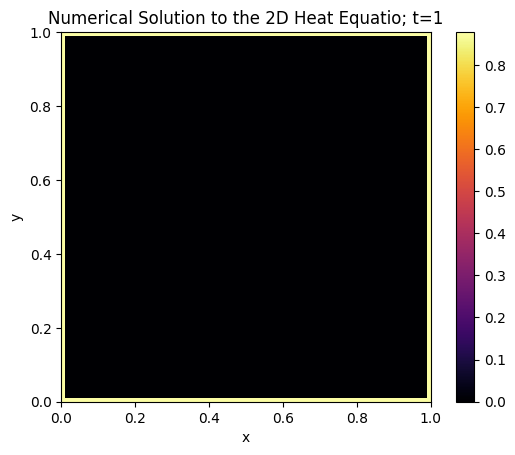

In [223]:
# If you want to test BCs, plot here

plt.figure()

plt.imshow(u[:, :, np.where(t_span == 0.5)[0][0]], extent=[x_span[0], x_span[-1], y_span[0], y_span[-1]], origin='lower', cmap='inferno')

plt.title(f'Numerical Solution to the 2D Heat Equatio; t={times[np.where(t_plot==t)[0][0]]}')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.show()

**Compute**

In [224]:
from logging import raiseExceptions
def f_1d(u,i,n,t_span,x_span):
    """
    Function representing our finited difference formula.

    Parameters
    ----------
    u : array
        Array containing the values of our function we know so far.
    i : int
        Space index.
    n : int
        Time index.
    t_span : array
        Set of t-values.
    x_span : array
        Set of x-values.

    Returns
    -------
    u_future : int
        Value of u one time step in the future.

    """
    dt = t_span[n] - t_span[n-1]
    dx = x_span[i] - x_span[i-1]

    u_future = a*(u[i+1,n] -2*u[i,n] + u[i-1,n])/(dx**2) *dt + u[i,n]

    return u_future


def f_2d(u,i,j,n,t_span,x_span,y_span):
    """
    Function representing our finited difference formula.

    Parameters
    ----------
    u : array
        Array containing the values of our function we know so far.
    i : int
        X-space index.
    j : int
        Y-space index.
    n : int
        Time index.
    t_span : array
        Set of t-values.
    x_span : array
        Set of x-values.
    y_span : array
        Set of y-values

    Returns
    -------
    u_future : int
        Value of u one time step in the future.

    """
    dt = t_span[n] - t_span[n-1]
    dx = x_span[i] - x_span[i-1]
    dy = y_span[j] - y_span[j-1]

    u_future = a*((u[i+1,j,n] -2*u[i,j,n] + u[i-1,j,n])/(dx**2) + (u[i,j+1,n] -2*u[i,j,n] + u[i,j-1,n])/(dy**2) )*dt + u[i,j,n]

    return u_future


def fd_1d(f,x_span, t_span, u):
    """
    Systematically performs an explicit, time-stepping Finite difference
    solver.

    Parameters
    ----------
    f : function
        Function for our finite difference formula..
    x_span : array
        Values of x.
    t_span : array
        values of t.
    u : array
        Zeros-like (x_span.t_span) to hold our output.

    Returns
    -------
    u : array
        Value of the function at each point in space and time.

    """
    Nt = len(t_span)
    Nx = len(x_span)

    for n in range(Nt-1):
        for i in range(1,Nx-1):
            u[i,n+1] = f(u,i,n,t_span,x_span)
    return u

def fd_2d(f,x_span,y_span, t_span, u):
    """
    Systematically performs an explicit, time-stepping Finite difference
    solver.

    Parameters
    ----------
    f : function
        Function for our finite difference formula..
    x_span : array
        Values of x.
    y_span : array
        Values of y
    t_span : array
        values of t.
    u : array
        Zeros-like (x_span, y_span, t_span) to hold our output.

    Returns
    -------
    u : array
        Value of the function at each point in space and time.

    """
    Nt = len(t_span)
    Nx = len(x_span)
    Ny = len(y_span)

    for n in range(Nt-1):
        for i in range(1,Nx-1):
            for j in range(1,Ny-1):
                u[i,j,n+1] = f(u,i,j,n,t_span,x_span,y_span)
    return u

def fem_1d(x_span, t_span, u):
    return u

def fem_2d(x_span, y_span, t_span, u):
  return u

# This code runs the method as specified
if dimension == 1:
  if method  == 'fd':
    u = fd_1d(f_1d,x_span, t_span, u)
  if method == 'fem':
    #u = fem_1d(x_span, t_span, u)
    raise ValueError('FEM not yet implemented. Please select another method.')
if dimension ==2:
  if method == 'fd':
    u = fd_2d(f_2d,x_span,y_span,t_span,u)
  if method == 'fem':
    #u=fem_2d(x_span, y_span, t_span, u)
    raise ValueError('FEM not yet implemented. Please select another method.')
u[u<0] = 0

**Graph**

In [225]:
# Input the times at which you would like to graph
times = [0,0.2,0.5,t_lim[1]]

In [226]:
# This finds the indeces of those times in order to plot them
t_plot = []

for t in times:
  t_plot.append(np.where(t_span==t)[0][0])

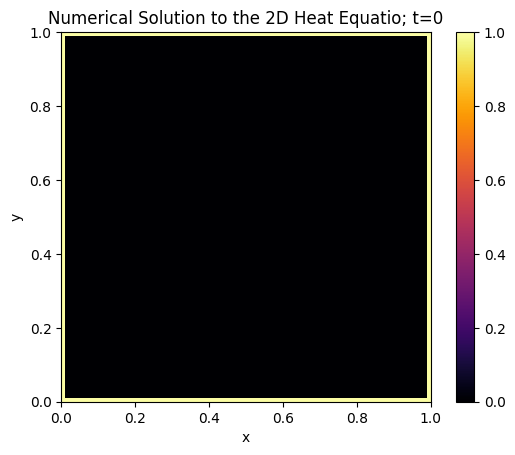

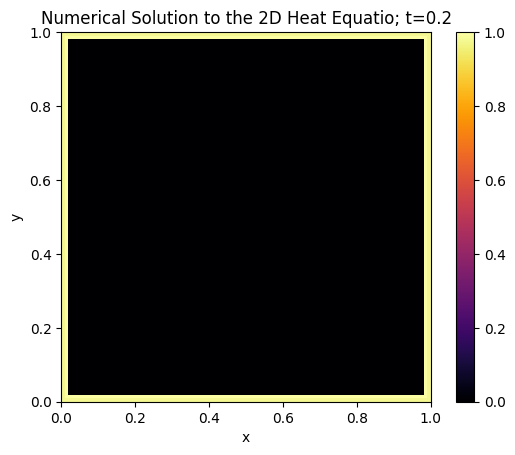

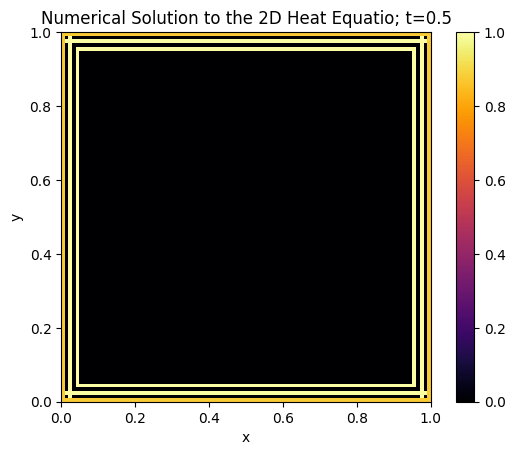

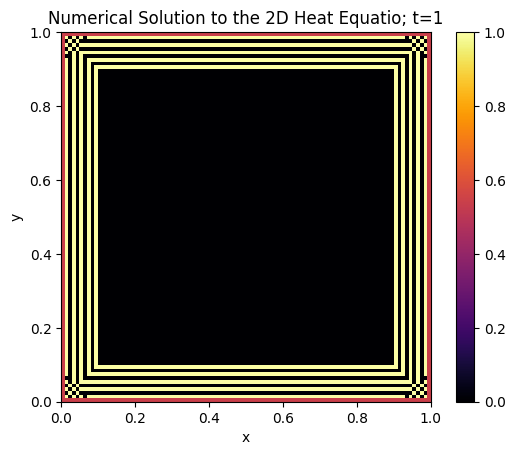

In [227]:
if dimension == 1:
  plt.figure()

  for t in t_plot:
    plt.plot(x_span, u[:,t], label=f't={times[np.where(t_plot==t)[0][0]]}')

  plt.title('Numerical Solution to the 1D Heat Equation')
  plt.xlabel('x')
  plt.ylabel('u(x,t)')
  plt.legend()

  plt.show()


if dimension == 2:
  for t in t_plot:
    plt.figure()

    plt.imshow(u[:, :, t], extent=[x_span[0], x_span[-1], y_span[0], y_span[-1]], origin='lower', cmap='inferno', vmin=0, vmax=1)

    plt.title(f'Numerical Solution to the 2D Heat Equatio; t={times[np.where(t_plot==t)[0][0]]}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar()

    plt.show()

**Animate**

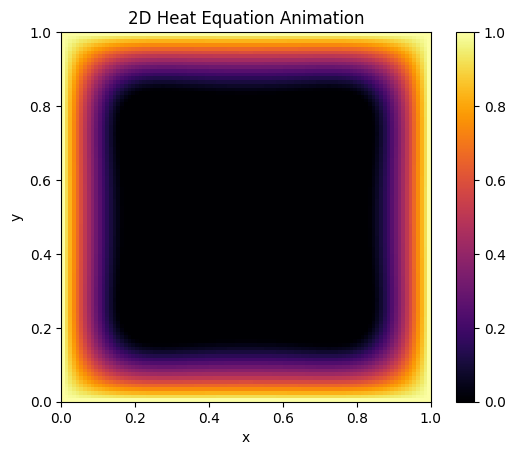

In [163]:
from IPython.display import HTML

fig, ax = plt.subplots()

if dimension == 1:
    # Initialize the line object
    line, = ax.plot(x_span, u[:, 0], color='blue')
    ax.set_title("1D Heat Equation Animation")
    ax.set_xlabel("x")
    ax.set_ylabel("u(x, t)")
    ax.set_ylim(0, 1)  # Set y-limits based on the solution

    def update(frame):
        # Update the y-data of the line for the current frame
        line.set_ydata(u[:, frame])
        return line,

if dimension == 2:
    im = ax.imshow(u[:, :, 0], extent=[x_span[0], x_span[-1], y_span[0], y_span[-1]], origin='lower', cmap='inferno')
    ax.set_title("2D Heat Equation Animation")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    cbar = fig.colorbar(im, ax=ax)

    def update(frame):
        # Update the 2D data for the current frame
        im.set_array(u[:, :, frame])
        return im,

# Create the animation
ani = animate.FuncAnimation(fig=fig, func=update, frames=Nt, interval=50, blit=True)
html = ani.to_html5_video()
display(HTML(html))